In [1]:
import cv2
import numpy as np
import os

In [2]:
# Create the directory
if not os.path.exists("data"):
    os.makedirs("data")
    os.makedirs("data/train")
    os.makedirs("data/test")
    os.makedirs("data/train/0")
    os.makedirs("data/train/1")
    os.makedirs("data/train/2")
    os.makedirs("data/train/3")
    os.makedirs("data/train/4")
    os.makedirs("data/train/5")
    os.makedirs("data/test/0")
    os.makedirs("data/test/1")
    os.makedirs("data/test/2")
    os.makedirs("data/test/3")
    os.makedirs("data/test/4")
    os.makedirs("data/test/5")

In [3]:
# Train or test 
mode = 'train'
directory = 'data/'+mode+'/'

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    
    # Getting count of existing images
    count = {'zero': len(os.listdir(directory+"/0")),
             'one': len(os.listdir(directory+"/1")),
             'two': len(os.listdir(directory+"/2")),
             'three': len(os.listdir(directory+"/3")),
             'four': len(os.listdir(directory+"/4")),
             'five': len(os.listdir(directory+"/5"))}
    
    # Printing the count in each set to the screen
    cv2.putText(frame, "MODE : "+mode, (10, 50), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "IMAGE COUNT", (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ZERO : "+str(count['zero']), (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "ONE : "+str(count['one']), (10, 140), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "TWO : "+str(count['two']), (10, 160), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "THREE : "+str(count['three']), (10, 180), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "FOUR : "+str(count['four']), (10, 200), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "FIVE : "+str(count['five']), (10, 220), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "Press ESC key to exit", (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 1)
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (64, 64)) 
 
    cv2.imshow("Frame", frame)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('0'):
        cv2.imwrite(directory+'0/'+str(count['zero'])+'.jpg', roi)
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory+'1/'+str(count['one'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory+'2/'+str(count['two'])+'.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv2.imwrite(directory+'3/'+str(count['three'])+'.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv2.imwrite(directory+'4/'+str(count['four'])+'.jpg', roi)
    if interrupt & 0xFF == ord('5'):
        cv2.imwrite(directory+'5/'+str(count['five'])+'.jpg', roi)
    
cap.release()
cv2.destroyAllWindows()

In [4]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# CNN Model

In [5]:
# Initializing the CNN
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=6, activation='softmax')) # softmax for more than 2

In [6]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(64, 64),
                                                 batch_size=5,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(64, 64),
                                            batch_size=5,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

train_dataset = tf.data.Dataset.from_generator(lambda: training_set,
                                               output_signature=(
                                                   tf.TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32),
                                                   tf.TensorSpec(shape=(None, 6), dtype=tf.float32)
                                               )).repeat()

test_dataset = tf.data.Dataset.from_generator(lambda: test_set,
                                              output_signature=(
                                                  tf.TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32),
                                                  tf.TensorSpec(shape=(None, 6), dtype=tf.float32)
                                              )).repeat()

history = classifier.fit(
        train_dataset,
        steps_per_epoch=600, # No of images in training set
        epochs=10,
        validation_data=test_dataset,
        validation_steps=30 # No of images in test set
)

Found 600 images belonging to 6 classes.
Found 30 images belonging to 6 classes.
Epoch 1/10
600/600 [==============================] - 22s 35ms/step - loss: 0.6608 - accuracy: 0.7373 - val_loss: 0.2888 - val_accuracy: 0.8667
Epoch 2/10
600/600 [==============================] - 24s 39ms/step - loss: 0.1559 - accuracy: 0.9467 - val_loss: 0.2037 - val_accuracy: 0.9600
Epoch 3/10
600/600 [==============================] - 28s 47ms/step - loss: 0.0613 - accuracy: 0.9787 - val_loss: 0.4367 - val_accuracy: 0.9067
Epoch 4/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.4027 - val_accuracy: 0.9333
Epoch 5/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.3571 - val_accuracy: 0.9400
Epoch 6/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.2905 - val_accuracy: 0.9333
Epoch 7/10
600/600 [==============================] - 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

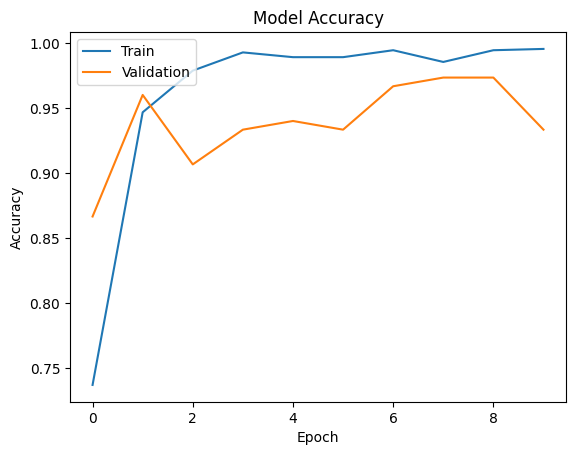

In [8]:
# Plot accuracy with respect to epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [10]:
# Saving the model
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
classifier.save_weights('model.h5')

# Prediction

In [11]:
from keras.models import model_from_json
import operator
import sys

In [12]:
# Loading the model
json_file = open("model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [13]:
cap = cv2.VideoCapture(0)
# Category dictionary
categories = {0: 'ZERO', 1: 'ONE', 2: 'TWO', 3: 'THREE', 4: 'FOUR', 5: 'FIVE'}

while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    roi = frame[y1:y2, x1:x2]
    
    # Resizing the ROI so it can be fed to the model for prediction
    roi = cv2.resize(roi, (64, 64)) 
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, test_image = cv2.threshold(roi, 120, 255, cv2.THRESH_BINARY)
    cv2.imshow("test", test_image)
    # Batch of 1
    result = loaded_model.predict(test_image.reshape(1, 64, 64, 1))
    prediction = {'ZERO': result[0][0], 
                  'ONE': result[0][1], 
                  'TWO': result[0][2],
                  'THREE': result[0][3],
                  'FOUR': result[0][4],
                  'FIVE': result[0][5]}
    # Sorting based on top prediction
    prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
    
    # Displaying the predictions
    cv2.putText(frame,"Bring your Sign in Blue Box", (10, 100), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,0), 1)
    cv2.putText(frame,"Predicted Word : "+prediction[0][0], (10, 120), cv2.FONT_HERSHEY_PLAIN, 1, (0,255,255), 1)
    cv2.putText(frame, "Press ESC key to exit", (10, 300), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 1)
    cv2.imshow("Frame", frame)
    
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
        
 
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 27ms/step
